<a href="https://colab.research.google.com/github/GermanStanzione/TT-2C2025-Data-Analitycs-Notebooks/blob/main/Clase_8/Mia/Clase_08_NB1_Cat_Merge_Join.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veamos con un ejemplo el uso de concat - merge - join

Contamos con dos estaciones meteorológicas, cada una instalada en una ubicación geográfica diferente, que sensan datos de temperatura, presión y humedad cada una hora.
<BR>
Simulemos algunas mediciones y armemos dos dataframes, uno para cada estación y con datos de un mismo día

In [1]:
import pandas as pd
import numpy as np

# Creamos una serie tipo datetime con 24 valores, mismo día y 24 horas.
horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")
horas

/tmp/ipython-input-1847358487.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  horas = pd.date_range("2025-10-11 00:00", periods=24, freq="H")


DatetimeIndex(['2025-10-11 00:00:00', '2025-10-11 01:00:00',
               '2025-10-11 02:00:00', '2025-10-11 03:00:00',
               '2025-10-11 04:00:00', '2025-10-11 05:00:00',
               '2025-10-11 06:00:00', '2025-10-11 07:00:00',
               '2025-10-11 08:00:00', '2025-10-11 09:00:00',
               '2025-10-11 10:00:00', '2025-10-11 11:00:00',
               '2025-10-11 12:00:00', '2025-10-11 13:00:00',
               '2025-10-11 14:00:00', '2025-10-11 15:00:00',
               '2025-10-11 16:00:00', '2025-10-11 17:00:00',
               '2025-10-11 18:00:00', '2025-10-11 19:00:00',
               '2025-10-11 20:00:00', '2025-10-11 21:00:00',
               '2025-10-11 22:00:00', '2025-10-11 23:00:00'],
              dtype='datetime64[ns]', freq='h')

In [3]:
# Simulamos el dataframe de la Estacion 1
estacion1 = pd.DataFrame({
    "hora": horas,
    "estacion": "E1",
    "temperatura": np.random.normal(20, 3, 24),  # genera 24 valores (dist normal) con media 20 y desviación 3
    "presion": np.random.normal(1013, 5, 24),  # genera 24 valores (dist normal) con media 1013 y desviación 5
    "humedad": np.random.uniform(40, 80, 24)  # genera 24 valores (dist uniform) con media 40 y desviación 8
})

In [4]:
estacion1.sample(3)

,hora,estacion,temperatura,presion,humedad
6,2025-10-11 06:00:00,E1,22.699263,1002.102027,76.101801
13,2025-10-11 13:00:00,E1,22.244677,1022.805219,67.576327
1,2025-10-11 01:00:00,E1,20.716507,1008.105258,51.835980


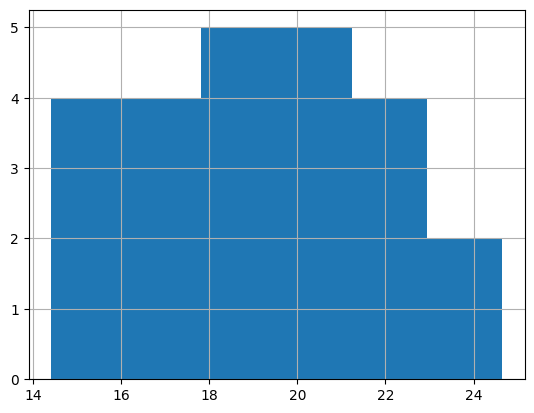

In [5]:
import matplotlib.pyplot as plt
estacion1["temperatura"].hist(bins="auto")
plt.show()

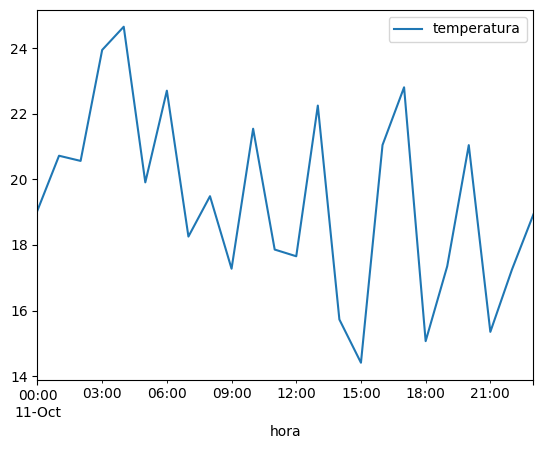

In [6]:
# Graficamos las temperaturas de 1 día
estacion1.plot(x="hora", y="temperatura", kind="line")
plt.show()

In [7]:
# Simulamos el dataframe de la Estacion 1
estacion2 = pd.DataFrame({
    "hora": horas,
    "estacion": "E2",
    "temperatura": np.random.normal(18, 2, 24),
    "presion": np.random.normal(1010, 4, 24),
    "humedad": np.random.uniform(35, 75, 24)
})

In [8]:
estacion2.sample(3)

,hora,estacion,temperatura,presion,humedad
13,2025-10-11 13:00:00,E2,18.024712,1006.940420,61.385185
18,2025-10-11 18:00:00,E2,17.268247,1012.705049,41.553133
2,2025-10-11 02:00:00,E2,16.632350,1012.416597,69.032946


## concat - Unificamos dos datasets usando concat

 La forma más natural de unificarlos en pandas es usando:
<BR>
`pd.concat()`
<BR>
Sirve para apilar DataFrames (uno debajo del otro o lado a lado).
Es ideal cuando los DataFrames tienen las mismas columnas (por ejemplo, mismo formato de mediciones de distintas estaciones).
<BR>
Por default, apila los datos verticalmente (uno debajo de otro), por lo que `axis = 0`
<BR>
Para ubicar los dataframes, uno seguido del otro, usamos el argumento `axis = 1`
<BR>
Cada dataframe tiene su index, por lo que es buena práctica al usar concat, regenerar el index en el dataframe resultante, para ello usamos `ignore_index=True`

In [10]:
# Unificamos los datos de ambas estaciones
est1_est2 = pd.concat([estacion1, estacion2], axis = 0, ignore_index=True)
est1_est2.sample(5)

,hora,estacion,temperatura,presion,humedad
46,2025-10-11 22:00:00,E2,19.507016,1013.539328,73.571834
42,2025-10-11 18:00:00,E2,17.268247,1012.705049,41.553133
28,2025-10-11 04:00:00,E2,16.325740,1008.340538,48.678370
5,2025-10-11 05:00:00,E1,19.904623,1013.788233,66.190843
41,2025-10-11 17:00:00,E2,19.566714,1009.281042,71.464984


## merge - une los dataframes por una columna en común
Lo usamos para comparar las mediciones de las estaciones


In [13]:
# Merge por la columna 'hora' (igual que un JOIN ON hora)
e1_e2_merge = pd.merge(estacion1, estacion2, on="hora", how="inner",suffixes=("_E1", "_E2"))
e1_e2_merge.sample(5)

,hora,estacion_E1,temperatura_E1,presion_E1,humedad_E1,estacion_E2,temperatura_E2,presion_E2,humedad_E2
17,2025-10-11 17:00:00,E1,22.801709,1009.184271,50.831058,E2,19.566714,1009.281042,71.464984
16,2025-10-11 16:00:00,E1,21.042668,1016.393915,70.930705,E2,16.137576,1003.897986,49.024500
2,2025-10-11 02:00:00,E1,20.558793,1008.916452,60.651162,E2,16.632350,1012.416597,69.032946
18,2025-10-11 18:00:00,E1,15.067598,1015.185728,55.340959,E2,17.268247,1012.705049,41.553133
12,2025-10-11 12:00:00,E1,17.653769,1020.445520,68.406385,E2,19.121595,1009.379076,47.745227


## join - une los dataframes por el index


In [14]:
# Establecemos 'hora' como índice
estacion1 = estacion1.set_index("hora")
estacion2 = estacion2.set_index("hora")

In [15]:
# Unimos por índice (hora)
e1_e2_join = estacion1.join(estacion2, how="inner", lsuffix="_E1", rsuffix="_E2")
e1_e2_join.sample(5)

,estacion_E1,temperatura_E1,presion_E1,humedad_E1,estacion_E2,temperatura_E2,presion_E2,humedad_E2
hora,,,,,,,,
2025-10-11 22:00:00,E1,17.244791,1002.940241,43.118536,E2,19.507016,1013.539328,73.571834
2025-10-11 20:00:00,E1,21.039172,1016.615528,71.883164,E2,21.119289,1012.808952,37.020023
2025-10-11 00:00:00,E1,19.050744,1006.709285,51.782514,E2,18.111049,1013.012257,39.490501
2025-10-11 15:00:00,E1,14.410650,1011.228552,55.723948,E2,20.219333,1011.730222,41.841433
2025-10-11 10:00:00,E1,21.539053,1003.987520,56.071502,E2,18.467678,1011.587053,49.672014


In [16]:
# Unimos solo la columna 'temperatura' de la segunda estación
e1_e2_join_cust = estacion1.join(estacion2["temperatura"], how="inner", lsuffix="_E1", rsuffix="_E2")
e1_e2_join_cust.sample(5)

,estacion,temperatura_E1,presion,humedad,temperatura_E2
hora,,,,,
2025-10-11 03:00:00,E1,23.939486,1018.892700,71.444319,17.790220
2025-10-11 19:00:00,E1,17.349144,1014.241059,47.413885,18.015930
2025-10-11 17:00:00,E1,22.801709,1009.184271,50.831058,19.566714
2025-10-11 09:00:00,E1,17.274675,1010.929186,55.426832,19.321279
2025-10-11 22:00:00,E1,17.244791,1002.940241,43.118536,19.507016


In [17]:
# Unimos solo las columnas de temperatura de ambas estaciones
e1_e2_join_cust = estacion1.join(estacion2[["temperatura"]], how="inner", lsuffix="_E1", rsuffix="_E2")
e1_e2_join_cust.sample(5)

,estacion,temperatura_E1,presion,humedad,temperatura_E2
hora,,,,,
2025-10-11 04:00:00,E1,24.647041,1013.841866,67.192422,16.325740
2025-10-11 18:00:00,E1,15.067598,1015.185728,55.340959,17.268247
2025-10-11 21:00:00,E1,15.350659,1017.822200,42.589791,21.457637
2025-10-11 10:00:00,E1,21.539053,1003.987520,56.071502,18.467678
2025-10-11 16:00:00,E1,21.042668,1016.393915,70.930705,16.137576


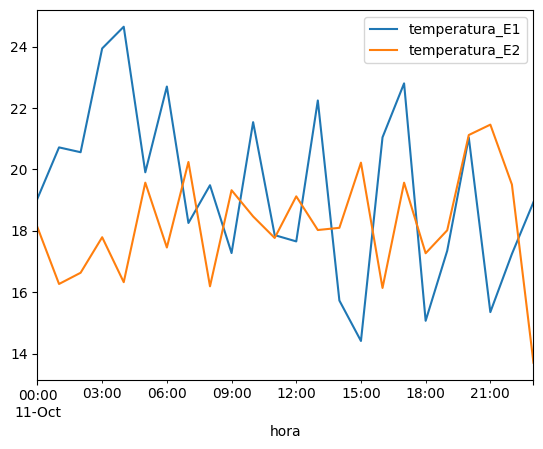

In [18]:
# Vere un gráfico comparativo
e1_e2_join_cust.plot(y=["temperatura_E1", "temperatura_E2"])
plt.show()

Si trabajás con datos horarios o diarios, join() es muy cómodo porque muchas veces ya tenés el tiempo como índice (DatetimeIndex). Te permite hacer operaciones de series temporales como:

# Importamos Dataset Booking - Hotels - Users
https://www.kaggle.com/code/sonawanelalitsunil/international-hotel-booking-analytics-ml-34-75/notebook

In [19]:
# Importar la librería Pandas
import pandas as pd

In [20]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['users.csv',
 'hotels.csv',
 'reviews.csv',
 'Kaggle_users.gsheet',
 'netflix_titles.csv',
 'youtube_shorts_tiktok_trends_2025.csv',
 'satis_clientes.csv',
 'booking_db_nulls.sqlite',
 'booking_db.sqlite',
 'InteractiveSheet_2025-09-22_12_53_41.gsheet',
 'train.csv']

In [22]:
# Cambiamos el directorio para importar con facilidad
os.chdir("/content/drive/MyDrive/datasets")
os.listdir(".")

['users.csv',
 'hotels.csv',
 'reviews.csv',
 'Kaggle_users.gsheet',
 'netflix_titles.csv',
 'youtube_shorts_tiktok_trends_2025.csv',
 'satis_clientes.csv',
 'booking_db_nulls.sqlite',
 'booking_db.sqlite',
 'InteractiveSheet_2025-09-22_12_53_41.gsheet',
 'train.csv']

In [23]:
# Importamos Reviews
reviews = pd.read_csv('reviews.csv')

In [24]:
# Importamos Hotels
hotels = pd.read_csv('hotels.csv')

In [25]:
# Importamos Users
users = pd.read_csv('users.csv')

## Actividad 1 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, r.score_overall
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
```

In [26]:
# Merge (equivalente al SQL JOIN)
hotel_reviews = pd.merge(hotels, reviews, left_on="hotel_id", right_on="hotel_id", how="inner")
hotel_reviews.sample(5)

,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,...,user_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
45576,23,Tango Boutique,Buenos Aires,Argentina,5,-34.6037,-58.3816,8.9,8.8,8.7,...,874,2022-04-05,8.6,8.3,8.6,8.8,9.1,8.6,7.9,Itself themselves put fact evidence end often....
32337,17,Kremlin Suites,Moscow,Russia,5,55.7558,37.6173,9.1,9.3,9.0,...,859,2020-03-16,9.1,9.0,9.3,9.3,9.4,9.4,7.7,Spring learn follow head name. Might this midd...
20222,11,The Bund Palace,Shanghai,China,5,31.2304,121.4737,9.1,9.0,9.2,...,129,2021-07-22,9.0,9.3,8.9,8.5,9.4,9.0,8.7,Big indicate turn program campaign nothing. Lo...
8073,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,...,1481,2024-09-16,9.2,8.5,9.1,8.6,9.4,10.0,9.1,Pretty want have write floor race. Behind whom...
30902,16,Han River Oasis,Seoul,South Korea,5,37.5665,126.9780,9.3,9.4,9.1,...,1027,2020-10-01,9.3,9.9,10.0,8.6,9.2,9.1,8.8,Trade some arm. Grow six fall happen radio sta...


In [27]:
# Seleccionamos solo las columnas que nos solicitan
hotel_reviews = hotel_reviews[["hotel_name", "country", "score_overall"]]
hotel_reviews.sample(5)

,hotel_name,country,score_overall
31513,Han River Oasis,South Korea,8.9
5191,L'Étoile Palace,France,8.8
12975,Sydney Harbour Grand,Australia,9.0
40103,The Bosphorus Inn,Turkey,8.8
27994,Table Mountain View,South Africa,8.9


## Actividad 2 (Dificultad *)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
GROUP by h.hotel_name, h.country
```

In [ ]:
# Merge (equivalente al SQL JOIN)


In [ ]:
# Agrupación / Agregación


## Actividad 3 (Dificultad ***)
Reproducir la siguiente consulta SQL con Pandas


```
select h.hotel_name, h.country, avg(r.score_overall) as avg_score
from  hotels h join reviews r
on h.hotel_id == r.hotel_id
WHERE h.country like '%argentina%'
GROUP by h.hotel_name, h.country
```



In [ ]:
# Merge (equivalente al SQL JOIN)


In [ ]:
# Filtro (equivalente al WHERE con LIKE)



In [ ]:
# Agrupación y promedio (equivalente al GROUP BY y AVG)


## Bonus Track
Usar OpenStreetMap para encontrar la dirección del Hotel

In [ ]:
# https://www.openstreetmap.org/search?lat=-34.6037&lon=-58.3816&zoom=10#map=12/-37.2888/-59.1229